In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel('training.xlsx')
class_1_data = data[data['output'] == 0].iloc[:, :-1]
class_2_data = data[data['output'] == 1].iloc[:, :-1]
centroid_class_1 = class_1_data.mean(axis=0)
centroid_class_2 = class_2_data.mean(axis=0)
spread_class_1 = class_1_data.std(axis=0)
spread_class_2 = class_2_data.std(axis=0)
interclass_distance = np.linalg.norm(centroid_class_1 - centroid_class_2)
print("Class 1 Centroid:")
print(centroid_class_1)
print("\nClass 1 Spread:")
print(spread_class_1)
print("\nClass 2 Centroid:")
print(centroid_class_2)
print("\nClass 2 Spread:")
print(spread_class_2)
print("\nInterclass Distance:", interclass_distance)


Class 1 Centroid:
embed_0     -0.153674
embed_1      0.211456
embed_2      0.155295
embed_3      0.093863
embed_4     -0.488665
               ...   
embed_379   -0.165440
embed_380   -0.152975
embed_381   -0.008719
embed_382    0.276078
embed_383   -0.030131
Length: 384, dtype: float64

Class 1 Spread:
embed_0      0.294157
embed_1      0.089135
embed_2      0.119411
embed_3      0.116298
embed_4      0.148771
               ...   
embed_379    0.179513
embed_380    0.249280
embed_381    0.095489
embed_382    0.233278
embed_383    0.161591
Length: 384, dtype: float64

Class 2 Centroid:
embed_0     -0.184075
embed_1      0.137983
embed_2      0.104661
embed_3      0.127538
embed_4     -0.408991
               ...   
embed_379   -0.153687
embed_380   -0.141090
embed_381    0.004908
embed_382    0.271903
embed_383   -0.027964
Length: 384, dtype: float64

Class 2 Spread:
embed_0      0.205344
embed_1      0.169176
embed_2      0.190184
embed_3      0.165142
embed_4      0.180539
         

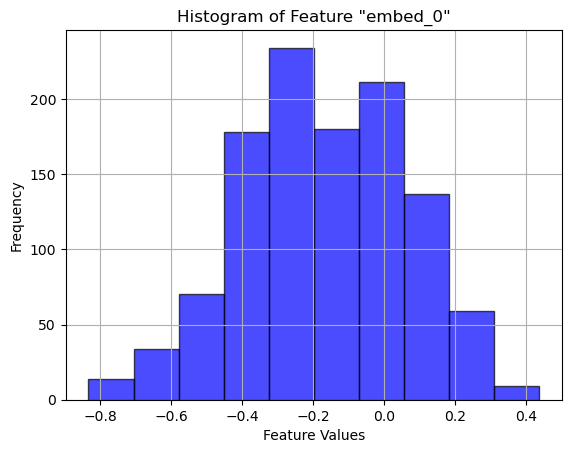

Mean: -0.17029445322602035
Variance: 0.05343827792925803


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('training.xlsx')
feature_data = data['embed_0']
hist, bins = np.histogram(feature_data, bins=10)  # You can adjust the number of bins as needed

plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature "embed_0"')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean:", mean)
print("Variance:", variance)


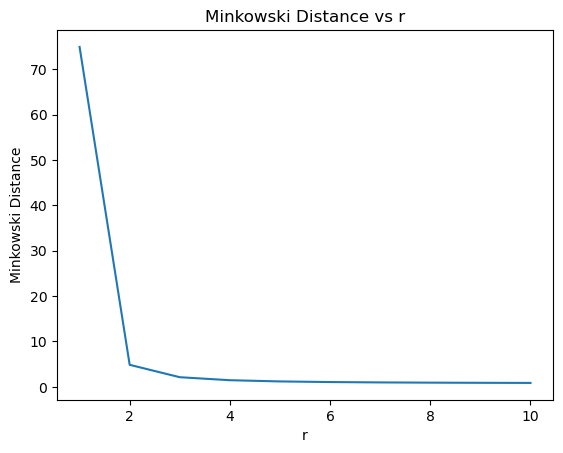

In [4]:
from scipy.spatial.distance import minkowski

feature_vector1 = data.iloc[0, :]  # Example feature vector 1
feature_vector2 = data.iloc[1, :]  # Example feature vector 2

r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, r)
    distances.append(distance)

plt.plot(r_values, distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['output'])  
y = data['output']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [17]:
import pandas as pd

data = pd.read_excel('training.xlsx')
def convert_to_binary_class(value):
    if value < 1:
        return 0
    elif value > 4:
        return 0
    else:
        return 1
data['output'] = data['output'].apply(convert_to_binary_class)
data.to_excel('modified_dataset.xlsx', index=False)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data = pd.read_excel('modified_dataset.xlsx')
X = data.drop('output', axis=1)
y = data['output']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7699115044247787


In [18]:
predictions = neigh.predict(X_test)
print("Predictions:", predictions)


Predictions: [2 2 3 2 3 2 1 2 2 3 3 3 3 2 2 2 2 2 3 2 2 3 3 2 2 2 2 1 1 2 3 3 2 2 3 2 2
 3 3 1 2 3 3 3 2 2 2 1 1 2 3 3 3 3 4 2 2 3 3 2 1 2 2 2 3 2 3 2 1 2 2 1 2 3
 3 3 3 3 1 2 2 3 2 2 3 2 3 3 2 3 2 2 3 2 2 1 3 1 1 2 3 3 2 3 2 4 3 1 3 2 3
 3 4 1 1 1 2 2 3 2 2 2 2 2 1 2 3 2 3 3 2 2 1 1 2 3 2 3 3 2 2 1 3 1 2 2 3 3
 1 2 2 2 2 1 3 3 2 2 4 3 2 1 3 3 1 2 2 3 3 3 1 3 2 2 3 2 3 4 1 2 2 1 3 2 3
 2 2 3 1 3 2 1 3 3 3 2 4 2 3 1 1 3 2 3 4 2 3 2 3 2 3 4 2 2 3 3 2 2 2 2 1 2
 1 1 3 2]


c:\Users\naman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


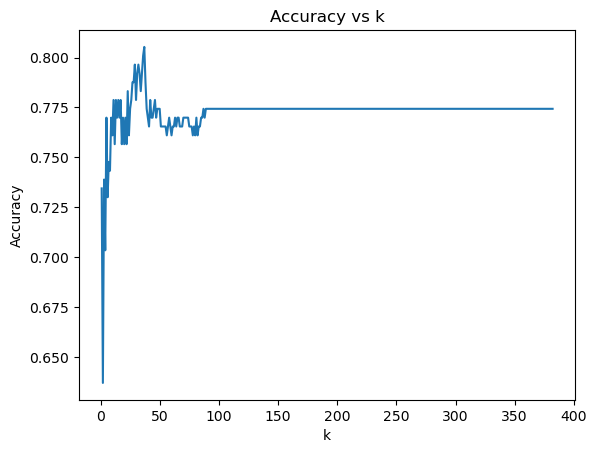

In [20]:
accuracy_values = []
k_values = range(1, 383)  
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 25,  26],
       [ 26, 149]], dtype=int64)

In [26]:
precision = 149 / (149 + 26)
recall = 149 / (149 + 26)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8514285714285714
Recall: 0.8514285714285714
F1-score: 0.8514285714285714
